# Coronavirus Brasil - Gráficos estáticos
> Gráficos e análises dos estados brasileiros

- toc: false
- branch: master
- badges: false
- comments: false
- author: Vinicius Bastos Gomes & Fernando Wittmann
- categories: [coronavirus]



In [0]:
#hide
# Imports
import warnings
warnings.filterwarnings('ignore')
import gzip
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
sns.set(style="ticks", rc={"lines.linewidth": 1.6})
sns.set_palette('dark')

In [134]:
#hide
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
#hide
# Abrir pasta com os arquivos
%cd "/content/drive/My Drive/CoronaVirus Brasil"

/content/drive/My Drive/CoronaVirus Brasil


In [0]:
#hide
!rm '/content/drive/My Drive/CoronaVirus Brasil/caso.csv.gz'

In [0]:
#hide
# Parameters
BOLETIM = 'https://data.brasil.io/dataset/covid19/boletim.csv.gz'
CASOS = 'https://data.brasil.io/dataset/covid19/caso.csv.gz'

In [0]:
#hide
# Functions
def sigla_nome(x):
    return dic[x]

def populacao(x):
    return popu[x]

In [139]:
#hide
# Execution
!wget {CASOS}

--2020-04-01 11:55:03--  https://data.brasil.io/dataset/covid19/caso.csv.gz
Resolving data.brasil.io (data.brasil.io)... 192.99.5.40
Connecting to data.brasil.io (data.brasil.io)|192.99.5.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36657 (36K) [application/gzip]
Saving to: ‘caso.csv.gz’

caso.csv.gz         100%[===================>]  35.80K  --.-KB/s    in 0.001s  

2020-04-01 11:55:04 (52.3 MB/s) - ‘caso.csv.gz’ saved [36657/36657]



In [140]:
#hide
#manipulating datetime
todei = date.today()
today = todei.strftime("%d-%m-%Y")
today_us = todei.strftime("%Y-%m-%d")
today_us
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

'2020-03-31'

In [0]:

#hide
with gzip.open('caso.csv.gz', 'rb') as f_in:
    with open('caso.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [142]:
#hide
ls

2020-03-31-corona-brasil-estatico.ipynb    Brasil.ipynb  graficovid/
2020-MES-DIA-corona-mundo-estatico.ipynb   caso.csv      plots/
ANO-MES-DIA-corona-mundo-interativo.ipynb  caso.csv.gz
ANO_MES_DIA_projecao_brasil.ipynb          dados.csv


In [0]:
#hide
#dictionaries
casos = pd.read_csv('caso.csv')
dic = {'AC': "Acre",  'AL': "Alagoas",  'AM': "Amapá", 'AP': "Amazonas", 'BA': "Bahia", 'CE': "Ceará", 'DF': "Distrito Federal",'ES': "Espírito Santo",'GO': "Goiás",'MA': "Maranhão",'MG': "Minas Gerais",'MS': "Mato Grosso do Sul",'MT': "Mato Grosso",'PA': "Pará",'PB': "Paraíba",'PE': "Pernambuco",'PI': "Piauí",'PR': "Paraná",'RJ': "Rio de Janeiro",'RN': "Rio Grande do Norte",'RO': "Rondônia",'RR': "Roraima",'RS': "Rio Grande do Sul",'SC': "Santa Catarina",'SE': "Sergipe",'SP': "São Paulo",'TO': "Tocantins"} 
popu ={'AC': 881935,'AL': 3337357,'AM': 4144597,'AP': 845731,'BA': 14873064,'CE': 9132078,'DF': 3015268,'ES': 4018650,'GO': 7018354,'MA': 7075181,'MG': 21168791,'MS': 2778986,'MT': 3484466,'PA': 8602865,'PB': 4018127,'PE': 9557071,'PI': 3273227,'PR': 11433957,'RJ': 17264943,'RN': 3506853,'RO': 1777225,'RR': 605761,'RS': 11377239,'SC': 7164788,'SE': 2298696,'SP': 45919049,'TO': 1572866}

In [0]:
#hide
#casos.set_index('date',inplace=True)


In [144]:
#hide
casos

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-03-31,TO,NaN,state,12,0.0,12,True,1572866.0,17.0,0.76294,NaN
1,2020-03-30,TO,NaN,state,11,0.0,11,False,1572866.0,17.0,0.69936,NaN
2,2020-03-29,TO,NaN,state,10,0.0,10,False,1572866.0,17.0,0.63578,NaN
3,2020-03-28,TO,NaN,state,9,0.0,9,False,1572866.0,17.0,0.57220,NaN
4,2020-03-27,TO,NaN,state,9,0.0,8,False,1572866.0,17.0,0.57220,NaN
5,2020-03-26,TO,NaN,state,8,0.0,7,False,1572866.0,17.0,0.50863,NaN
6,2020-03-25,TO,NaN,state,7,NaN,6,False,1572866.0,17.0,0.44505,NaN
7,2020-03-24,TO,NaN,state,7,NaN,5,False,1572866.0,17.0,0.44505,NaN
8,2020-03-23,TO,NaN,state,7,NaN,4,False,1572866.0,17.0,0.44505,NaN
9,2020-03-22,TO,NaN,state,5,NaN,3,False,1572866.0,17.0,0.31789,NaN


In [145]:
#hide
y = casos[casos.duplicated()]
y

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate


In [146]:
#hide
casos_por_estado = casos.groupby(['state','date']).sum()[['confirmed', 'deaths']]
casos_por_estado

confirmed  deaths
state date                         
AC    2020-03-17          6     0.0
      2020-03-18          6     0.0
      2020-03-19          8     0.0
      2020-03-20         14     0.0
      2020-03-21         22     0.0
      2020-03-22         22     0.0
      2020-03-23         34     0.0
      2020-03-24         42     0.0
      2020-03-25         46     0.0
      2020-03-26         46     0.0
      2020-03-27         50     0.0
      2020-03-28         50     0.0
      2020-03-29         68     0.0
      2020-03-30         82     0.0
      2020-03-31         84     0.0
AL    2020-03-08          2     0.0
      2020-03-09          2     0.0
      2020-03-10          2     0.0
      2020-03-12          2     0.0
      2020-03-13          2     0.0
      2020-03-16          2     0.0
      2020-03-17          2     0.0
      2020-03-18          2     0.0
      2020-03-19          8     0.0
      2020-03-20         12     0.0
      2020-03-21         14     0.0
      2020-03-22         14     0.0
      2020-03-23         16     0.0
      2020-03-24         20     0.0
      2020-03-25         22     0.0
      2020-03-26         22     0.0
      2020-03-27         24     0.0
      2020-03-28         28     0.0
      2020-03-29         34     0.0
      2020-03-30         34     0.0
      2020-03-31         36     2.0
AM    2020-03-13          3     0.0
      2020-03-18          6     0.0
      2020-03-19          9     0.0
      2020-03-20         20     0.0
      2020-03-21         29     0.0
      2020-03-22         52     0.0
      2020-03-23         64     0.0
      2020-03-24         94     2.0
      2020-03-25        108     2.0
      2020-03-26        134     2.0
      2020-03-27        162     2.0
      2020-03-28        222     2.0
      2020-03-29        280     2.0
      2020-03-30        302     4.0
      2020-03-31        350     6.0
AP    2020-03-20          2     0.0
      2020-03-21          2     0.0
      2020-03-22          2     0.0
      2020-03-23          2     0.0
      2020-03-24          2     0.0
      2020-03-25          4     0.0
      2020-03-26          4     0.0
      2020-03-27          6     0.0
      2020-03-28          8     0.0
      2020-03-29         16     0.0
      2020-03-30         16     0.0
      2020-03-31         20     0.0
BA    2020-03-06          2     0.0
      2020-03-07          4     0.0
      2020-03-09          4     0.0
      2020-03-10          4     0.0
      2020-03-11          6     0.0
      2020-03-12          6     0.0
      2020-03-13         14     0.0
      2020-03-15         18     0.0
      2020-03-16         20     0.0
      2020-03-17         28     0.0
      2020-03-18         54     0.0
      2020-03-19         62     0.0
      2020-03-20         68     0.0
      2020-03-21         82     0.0
      2020-03-22        110     0.0
      2020-03-23        126     0.0
      2020-03-24        158     0.0
      2020-03-25        182     0.0
      2020-03-26        216     0.0
      2020-03-27        246     0.0
      2020-03-28        254     0.0
      2020-03-29        312     2.0
      2020-03-30        352     4.0
      2020-03-31        434     4.0
CE    2020-03-16         18     0.0
      2020-03-17         20     0.0
      2020-03-18         38     0.0
      2020-03-19         25     0.0
      2020-03-20        136     0.0
      2020-03-21        168     0.0
      2020-03-22        250     0.0
      2020-03-23        328     0.0
      2020-03-24        370     0.0
      2020-03-25        422     0.0
      2020-03-26        474     6.0
      2020-03-27        564     6.0
      2020-03-28        644     8.0
      2020-03-29        718    10.0
      2020-03-30        764    10.0
      2020-03-31        802    14.0
DF    2020-03-07          2     0.0
      2020-03-08          2     0.0
      2020-03-09          2     0.0
      2020-03-10          2     0.0
      2020-03-11          4     0.0
      2020-03-12          4     0.0
      2020-03-13      

In [147]:
#hide
casos_por_estado = casos_por_estado.reset_index(level=[0,1])
casos_por_estado.tail(5)

,state,date,confirmed,deaths
464,TO,2020-03-27,18,0.0
465,TO,2020-03-28,18,0.0
466,TO,2020-03-29,20,0.0
467,TO,2020-03-30,22,0.0
468,TO,2020-03-31,24,0.0


In [148]:
#hide
x = casos_por_estado[casos_por_estado.duplicated()]
x

,state,date,confirmed,deaths


In [149]:
#hide
#casos_por_estado.set_index('date',inplace=True)
casos_por_estado.tail(5)

,state,date,confirmed,deaths
464,TO,2020-03-27,18,0.0
465,TO,2020-03-28,18,0.0
466,TO,2020-03-29,20,0.0
467,TO,2020-03-30,22,0.0
468,TO,2020-03-31,24,0.0


In [150]:
#hide
# adding a relative approach column
casos_por_estado['população']=casos_por_estado['state']
casos_por_estado['população'] = casos_por_estado['população'].apply(populacao)
casos_por_estado['Relativa'] = 10000*(casos_por_estado['confirmed']/casos_por_estado['população']) #a cada 10 mil
casos_por_estado.tail(5)

,state,date,confirmed,deaths,população,Relativa
464,TO,2020-03-27,18,0.0,1572866,0.114441
465,TO,2020-03-28,18,0.0,1572866,0.114441
466,TO,2020-03-29,20,0.0,1572866,0.127156
467,TO,2020-03-30,22,0.0,1572866,0.139872
468,TO,2020-03-31,24,0.0,1572866,0.152588


In [151]:
#hide
casos_por_estado[casos_por_estado['state']=='SP'].tail(5)

,state,date,confirmed,deaths,população,Relativa
451,SP,2020-03-27,2446,136.0,45919049,0.532677
452,SP,2020-03-28,1406,84.0,45919049,0.306191
453,SP,2020-03-29,1451,98.0,45919049,0.315991
454,SP,2020-03-30,3034,226.0,45919049,0.660728
455,SP,2020-03-31,4678,272.0,45919049,1.018749


In [0]:
#hide

# Generalizando para um loop
#plt.figure(figsize=(16, 8))
#lista_estados = casos_por_estado['state'].unique()
#
#for estado in lista_estados:
#    confirmed = casos_por_estado[casos_por_estado['state']==estado][['date', 'confirmed']]
#    confirmed['date'] = pd.to_datetime(confirmed['date'])
#    plt.plot(confirmed['date'], confirmed['confirmed'], label=estado)
#
#plt.legend()


In [152]:
#hide
# Change states` names
casos_por_estado['state'] = casos_por_estado['state'].apply(sigla_nome)
casos_por_estado.tail()

,state,date,confirmed,deaths,população,Relativa
464,Tocantins,2020-03-27,18,0.0,1572866,0.114441
465,Tocantins,2020-03-28,18,0.0,1572866,0.114441
466,Tocantins,2020-03-29,20,0.0,1572866,0.127156
467,Tocantins,2020-03-30,22,0.0,1572866,0.139872
468,Tocantins,2020-03-31,24,0.0,1572866,0.152588


In [153]:
#hide
#beggining on march 5
casos_por_estado['date'] = pd.to_datetime(casos_por_estado['date']) 
casos_mar5 = casos_por_estado[casos_por_estado['date']>='2020-03-15']
casos_mar5.head()


,state,date,confirmed,deaths,população,Relativa
0,Acre,2020-03-17,6,0.0,881935,0.068032
1,Acre,2020-03-18,6,0.0,881935,0.068032
2,Acre,2020-03-19,8,0.0,881935,0.090710
3,Acre,2020-03-20,14,0.0,881935,0.158742
4,Acre,2020-03-21,22,0.0,881935,0.249451


In [154]:
#hide
#interactive plot (attempt)
import plotly.express as px
fig = px.line(casos_mar5, x="date",y='confirmed',color='state',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas dos estados brasileiros",)    
fig.show()

<center> <h2> Gráficos de contaminação </h2> </center>


In [0]:
#hide
casos_mar5.sort_values('confirmed',ascending=False,inplace=True)
hue1 = casos_mar5['state'].unique()

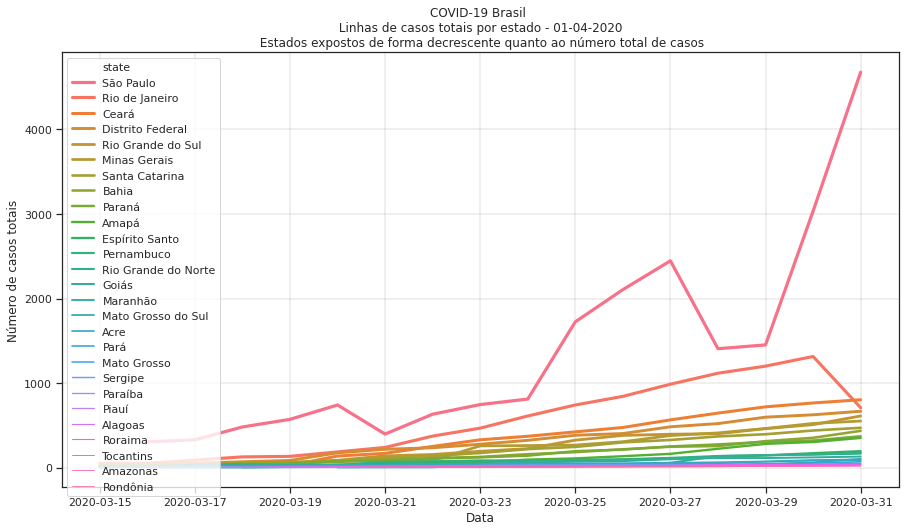

In [156]:
#hide_input

#absolute approach line plot
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='confirmed',data=casos_mar5,hue='state',size="state",hue_order=hue1)
plt.title('COVID-19 Brasil \n Linhas de casos totais por estado - {} \n Estados expostos de forma decrescente quanto ao número total de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Número de casos totais')
plt.savefig("plots/15_curvas_brasileiras.png")


In [0]:
#hide
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
hue = casos_mar5['state'].unique()

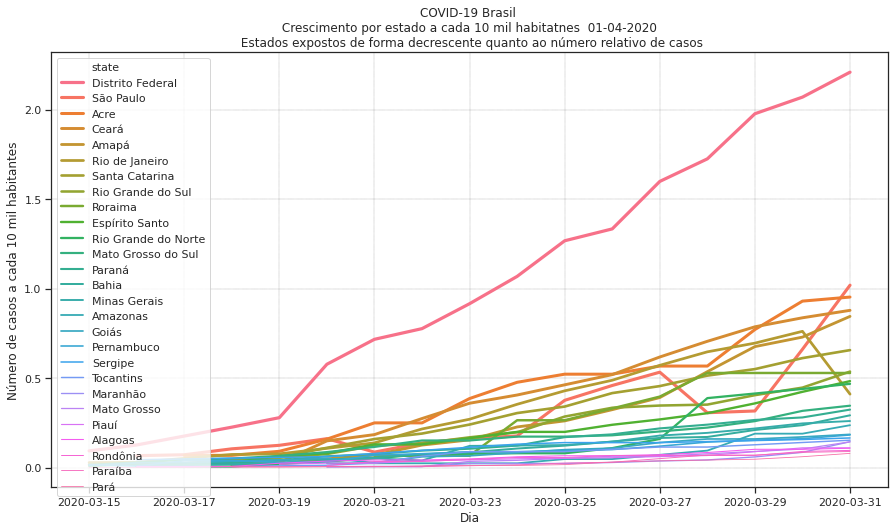

In [158]:
#hide_input

#Relativa approach line plot
casos_mar5.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='date',y='Relativa',data=casos_mar5,hue='state',size="state",hue_order=hue)
plt.title('COVID-19 Brasil \n Crescimento por estado a cada 10 mil habitatnes  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

In [159]:
#hide

#Relative approach line plot (interactive)
casos_mar5.sort_values(by=['state','date'])
import plotly.express as px
fig = px.line(casos_mar5, x="date",y='Relativa',color='state',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros",)    
fig.show()

In [160]:
#hide
df_last = casos_mar5.groupby('state').max()[['date','confirmed','deaths','Relativa']]
df_last = df_last.reset_index()
df_last.tail(3)

,state,date,confirmed,deaths,Relativa
24,Sergipe,2020-03-31,38,0.0,0.165311
25,São Paulo,2020-03-31,4678,272.0,1.018749
26,Tocantins,2020-03-31,24,0.0,0.152588


In [0]:
#hide
#dropping DF
df_last_semdf = df_last[df_last['state']!='Distrito Federal']

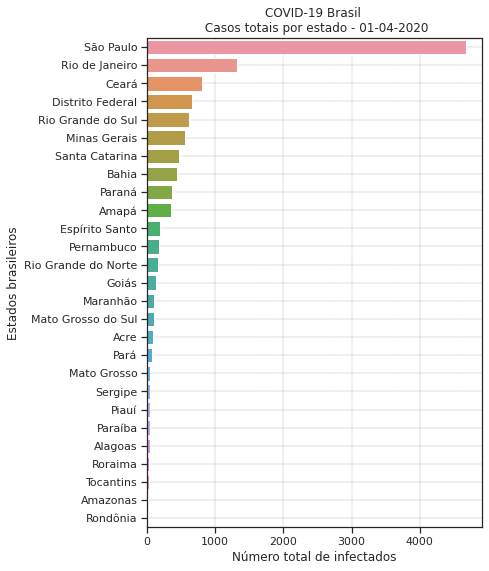

In [162]:
#hide_input
# absolute approach bar plot
df_last.sort_values('confirmed',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['confirmed'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de infectados')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

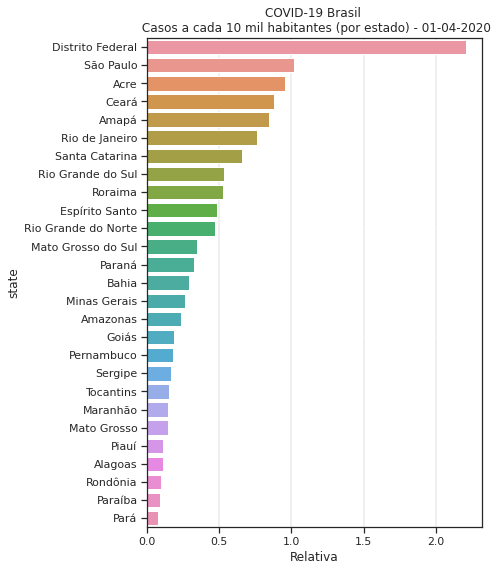

In [163]:
#hide_input

# relative approach bar plot

df_last.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado) - {}'.format(today))
plt.ylabel('Estados brasileiros')
plt.xlabel('Infectados a cada 10 mil habitantes')
sns.barplot(df_last['Relativa'],df_last['state'],orient="h")

plt.savefig('plots/13_brasil_relativo',bbox_inches = 'tight')

In [0]:
#hide
df_last_semdf.sort_values('Relativa',ascending=False,inplace=True)


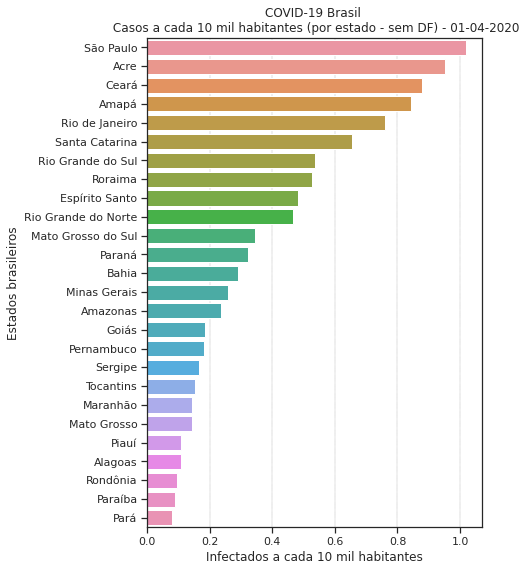

In [165]:
#hide_input

# relative approach bar plot (without DF)

plt.figure(figsize=(6,9))
plt.grid(color='black', linestyle='--', linewidth=0.17)
sns.barplot(df_last_semdf['Relativa'],df_last_semdf['state'],orient="h")

plt.title('COVID-19 Brasil \n Casos a cada 10 mil habitantes (por estado - sem DF) - {}'.format(today))
plt.ylabel('Estados brasileiros')
plt.xlabel('Infectados a cada 10 mil habitantes')
plt.savefig('plots/14_brasil_relativo_sem_df',bbox_inches = 'tight')

In [0]:
#hide
#plt.figure(figsize=(15,8))
#sns.lineplot(x='date',y='confirmed',data=x)
#plt.title('COVID-19 - Crescimento {}(relativo)- {}'.format(y,today))
#texto1 = 'Quarentena'
#plt.text('2020-03-24',125,texto1,fontsize=12)
#
#plt.grid(color='black', linestyle='--', linewidth=0.17)


In [0]:
#hide
# exporting xlsx to concat with up to date data
#df_last1 = casos_mar5
#df_last1.columns = ['Estado', 'Dia','Casos','Mortes','População','Relativa']
#df_last1 = df_last1.reindex(columns=['Dia','Casos','Estado','Mortes','População','Relativa'])
#df2 = df_last1[df_last1['Dia']<'2020-03-25']
#df2.tail(3)

In [0]:
#hide
#df2.to_excel('graficovid/Tabela_brasil_até_25.xlsx',index=False)

In [168]:
#hide
casos_mar5.columns

Index(['state', 'date', 'confirmed', 'deaths', 'população', 'Relativa'], dtype='object')

In [0]:
#hide
casos_mar5.columns = ['Estado', 'Dia', 'Casos', 'Mortes', 'população', 'Relativa']

In [0]:
#hide
sul = casos_mar5[(casos_mar5['Estado']=='Paraná') | (casos_mar5['Estado']=='Santa Catarina') | (casos_mar5['Estado']=='Rio Grande do Sul')]

In [0]:
#hide
sudeste = casos_mar5[(casos_mar5['Estado']=='São Paulo') | (casos_mar5['Estado']=='Minas Gerais') | (casos_mar5['Estado']=='Rio de Janeiro') | (casos_mar5['Estado']=='Espírito Santo ')]

In [0]:
#hide
centroeste =  casos_mar5[(casos_mar5['Estado']=='Goiás') | (casos_mar5['Estado']=='Mato Grosso') | (casos_mar5['Estado']=='Mato Grosso do Sul')]

In [0]:
#hide
norte = casos_mar5[(casos_mar5['Estado']=='Acre') | (casos_mar5['Estado']=='Amapá') | (casos_mar5['Estado']=='Amazonas') | (casos_mar5['Estado']=='Pará') | (casos_mar5['Estado']=='Rondônia')| (casos_mar5['Estado']=='Roraima')| (casos_mar5['Estado']=='Tocantins')]

In [0]:
#hide
nordeste = casos_mar5[(casos_mar5['Estado']=='Alagoas') | (casos_mar5['Estado']=='Bahia') | (casos_mar5['Estado']=='Ceará') | (casos_mar5['Estado']=='Maranhão') | (casos_mar5['Estado']=='Paraíba')| (casos_mar5['Estado']=='Pernambuco')| (casos_mar5['Estado']=='Piauí')| (casos_mar5['Estado']=='Rio Grande do Norte')| (casos_mar5['Estado']=='Piauí')]

<center> <h2> Curvas de contaminação por regiões</h2> </center>


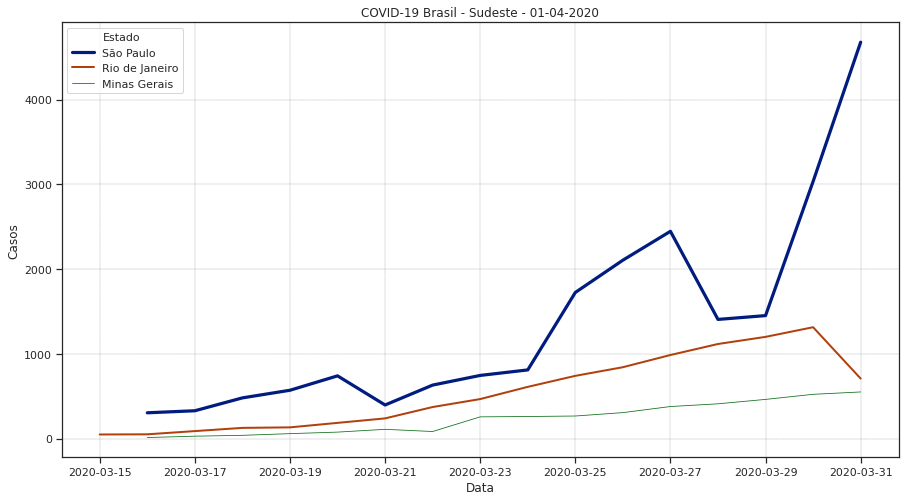

In [175]:
#hide_input
#Sudeste absoluta
sudeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sudeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/18_sudeste_absoluta.png",bbox_inches = 'tight')

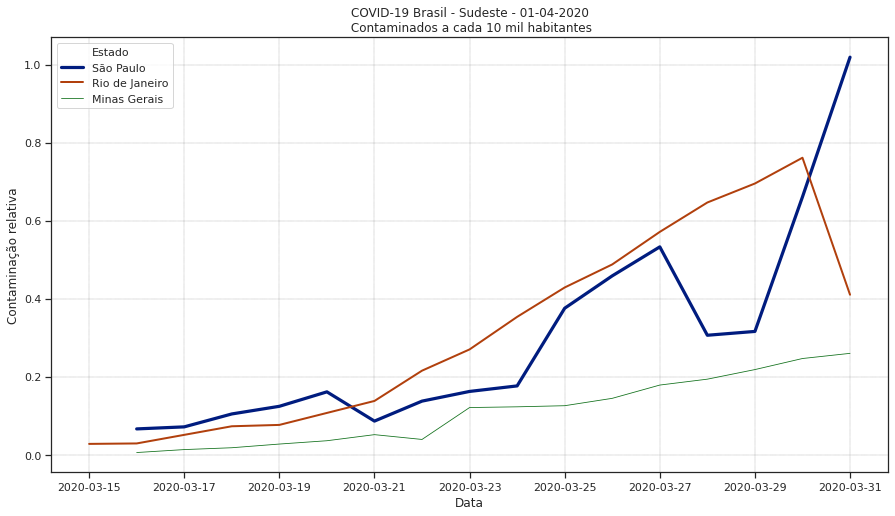

In [176]:
#hide_input
#sudeste relativa
sudeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=sudeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sudeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/19_sudeste_relativa.png",bbox_inches = 'tight')

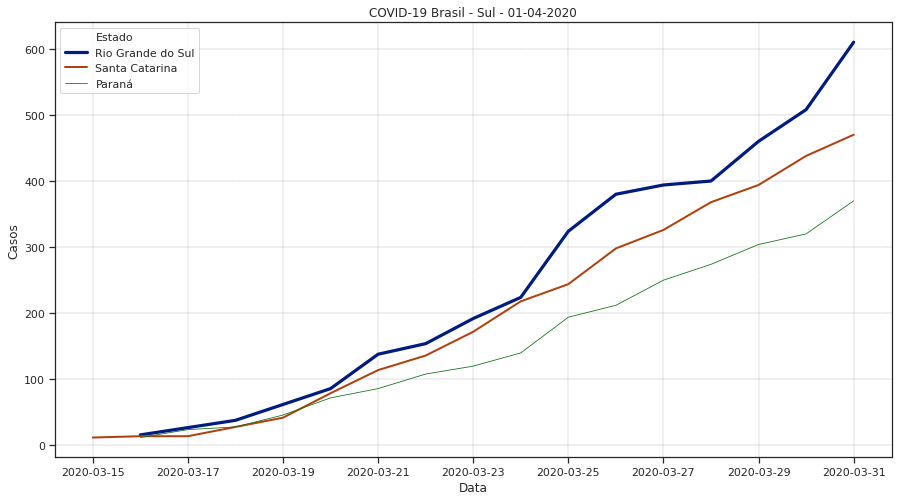

In [177]:
#hide_input
#sul absoluta
sul.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sul - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/20_sul_absoluta.png",bbox_inches = 'tight')

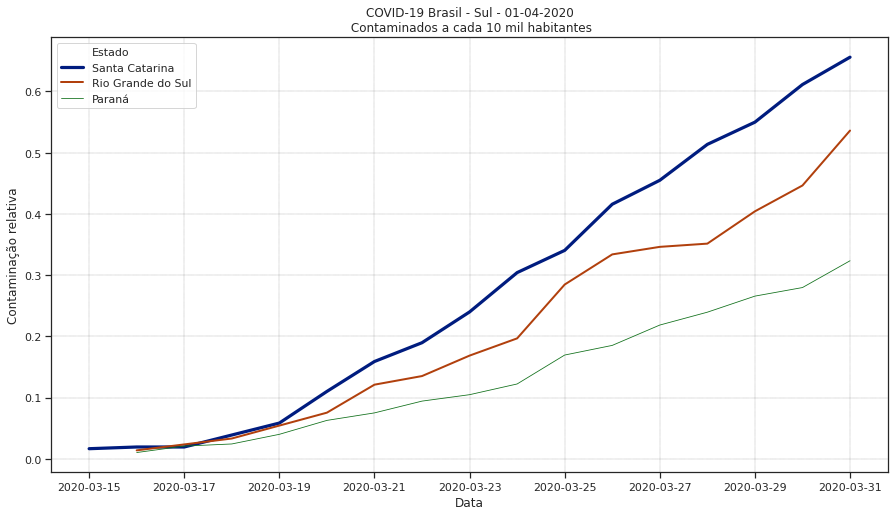

In [178]:
#hide_input
#sul relativa
sul.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=sul,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Sul - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/21_sul_relativa.png",bbox_inches = 'tight')

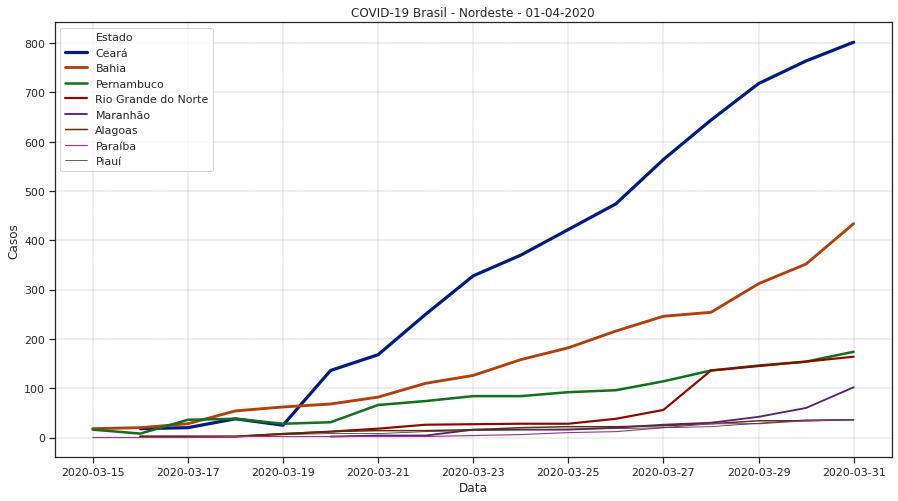

In [179]:
#hide_input
#nordeste absoluta
nordeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Nordeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/22_nordeste_absoluta.png",bbox_inches = 'tight')

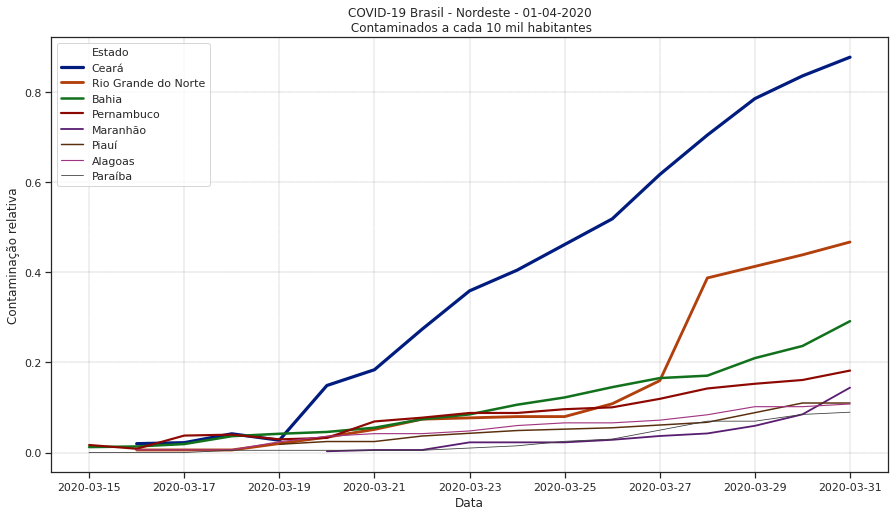

In [180]:
#hide_input
#nordeste relativa
nordeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=nordeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Nordeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/23_brasil_curva_relativa.png",bbox_inches = 'tight')

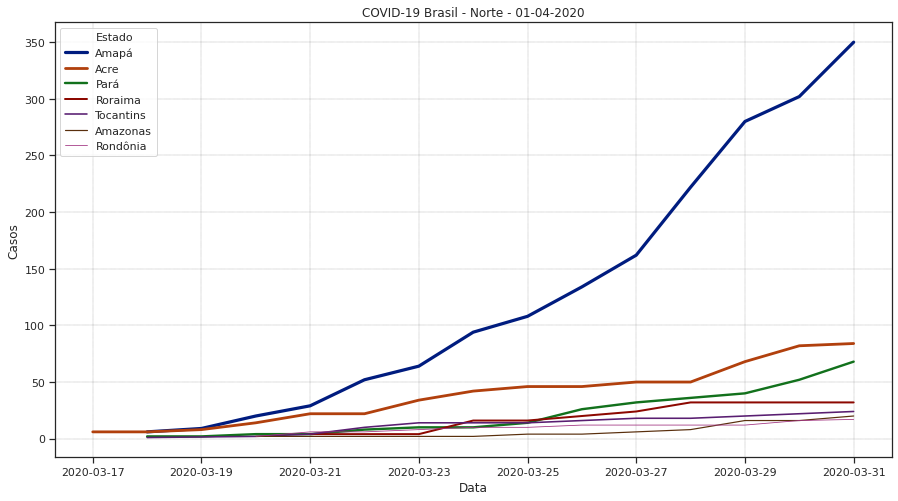

In [181]:
#hide_input
#norte absoluta
norte.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Norte - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/24_norte_absoluta.png",bbox_inches = 'tight')

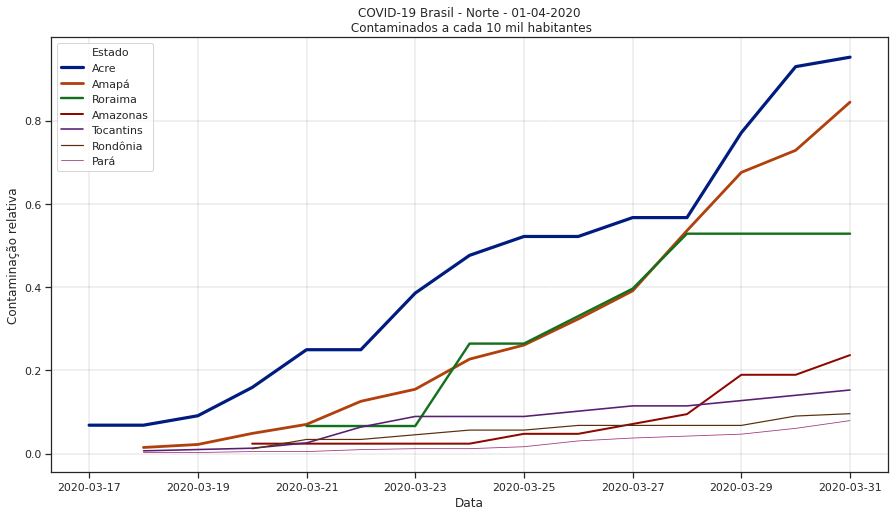

In [182]:
#hide_input
#norte relativa
norte.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=norte,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Norte - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/25_norte_relativa.png",bbox_inches = 'tight')

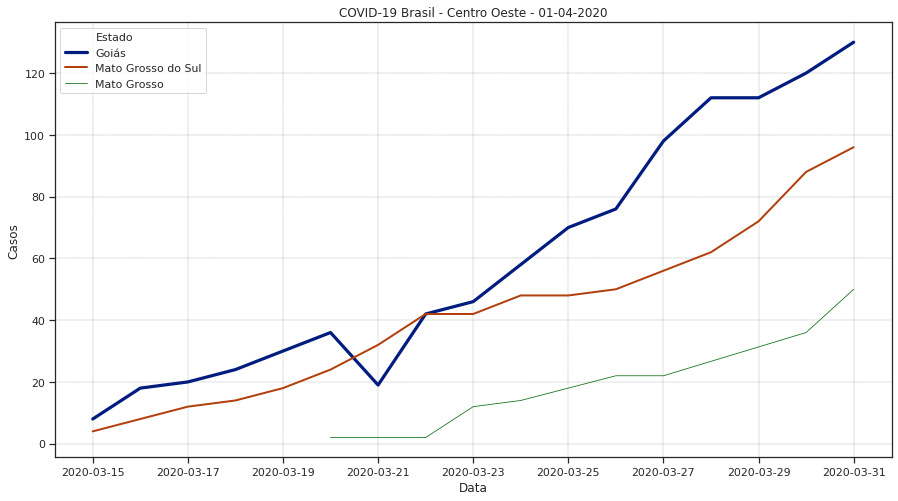

In [183]:
#hide_input
#centroste absoluta
centroeste.sort_values('Casos',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Casos',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Centro Oeste - {}'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Casos')
plt.savefig("plots/26_centroeste_absoluta.png",bbox_inches = 'tight')

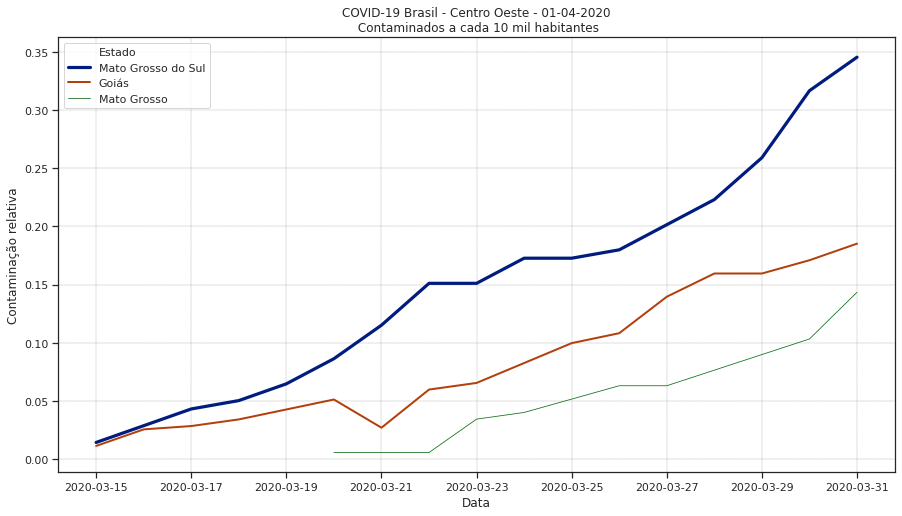

In [184]:
#hide_input
#centroeste relativa
centroeste.sort_values('Relativa',ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Relativa',data=centroeste,hue='Estado',size="Estado")
plt.title('COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

In [185]:
#hide
fig = px.line(centroeste, x="Dia",y='Relativa',color='Estado',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros",)    
fig.show()

In [186]:
#hide
casos_por_cidade = casos.groupby(['state','city','date']).sum()[['confirmed', 'deaths']]
casos_por_cidade = casos_por_cidade.reset_index(level=[0,1])

casos_por_cidade.head(5)


,state,city,confirmed,deaths
date,,,,
2020-03-29,AC,Acrelândia,2,0.0
2020-03-30,AC,Acrelândia,6,0.0
2020-03-31,AC,Acrelândia,7,0.0
2020-03-29,AC,Porto Acre,1,0.0
2020-03-30,AC,Porto Acre,1,0.0


In [0]:
#hide
cidade_last = casos_por_cidade[casos_por_cidade.index==str(yesterday)]


In [0]:
#hide
cap = ['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Brasília','Vitória','Goiânia','São Luís','Cuiabá','Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro','Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas']

In [0]:
#hidecasos_por_cidade.columns

In [0]:
#hide
capitais = casos_por_cidade[casos_por_cidade['city'].isin(['Rio Branco','Maceió','Macapá','Manaus','Salvador','Fortaleza','Brasília','Vitória','Goiânia','São Luís','Cuiabá','Campo Grande','Belo Horizonte','Belém','João Pessoa','Curitiba','Recife','Teresina','Rio de Janeiro','Natal','Porto Alegre','Porto Velho','Boa Vista','Florianópolis','São Paulo','Aracaju','Palmas'])]
capitais_15 = capitais[capitais.index>='2020-03-20']

In [191]:
#hide
capitais_15.sort_values('confirmed',ascending=False,inplace=True)
teste = capitais_15.groupby(capitais_15.index)
teste

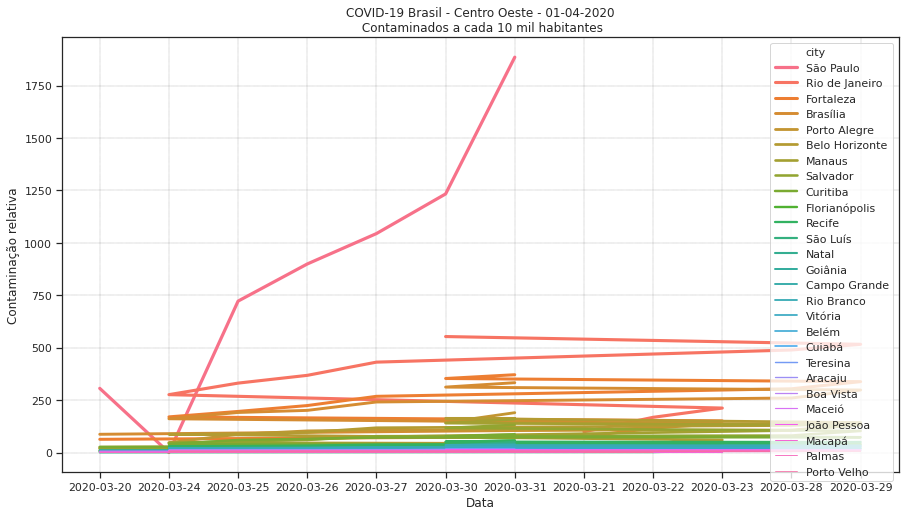

In [192]:
#hide
plt.figure(figsize=(15,8))

sns.lineplot(x=capitais_15.index,y='confirmed',data=capitais_15,hue='city',size="city")
plt.title('COVID-19 Brasil - Centro Oeste - {}\n Contaminados a cada 10 mil habitantes'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Data')
plt.ylabel('Contaminação relativa')
plt.savefig("plots/27_centroeste_relativa.png",bbox_inches = 'tight')

<center> <h2> Tabela das 200 cidades com mais casos </h2> </center>


In [193]:
#hide_input
pd.set_option('display.max_rows', None) 
x= cidade_last.sort_values('confirmed',axis=0,ascending=False)
x.columns = ['Estado','Cidade','Casos','Mortes']
x.head(200)

,Estado,Cidade,Casos,Mortes
date,,,,
2020-03-31,SP,São Paulo,1885,121.0
2020-03-31,CE,Fortaleza,371,6.0
2020-03-31,DF,Brasília,333,3.0
2020-03-31,RS,Porto Alegre,190,2.0
2020-03-31,MG,Belo Horizonte,163,2.0
2020-03-31,AM,Manaus,159,2.0
2020-03-31,BA,Salvador,132,2.0
2020-03-31,PR,Curitiba,87,0.0
2020-03-31,SC,Florianópolis,58,0.0


In [194]:
#hide
plt.plot(x['Casos'].rolling(5).mean(),x['Shifted'].rolling(5).mean())


KeyError: ignored

In [0]:
#hide
casos_mar5.columns
casos_mar5['Dia']=  pd.to_datetime(casos_mar5['Dia'])
casos_mar5.set_index('Dia',inplace=True)

In [0]:
#hide
#hide
casos_mar5.index

In [0]:
#hide
import plotly.express as px

fig = px.bar(casos_mar5, x="Estado", y="Casos", color="Estado",
  animation_frame=casos_mar5.index, range_y=[0,4000])
fig.show()
#fig.update_layout( yaxis_type="log")



#fig.write_html("plots/11_letalidade.html")

In [0]:
#hide
fig = px.line(sudeste, x="Dia",y='Relativa',color='Estado',color_discrete_sequence=px.colors.qualitative.G10,title="Curvas relativas dos estados brasileiros")    
fig.show()

In [0]:
#hide
sudeste['Dia'] = sudeste['Dia'].dt.strftime('%Y-%m-%d')


In [0]:
#hide
sudeste.set_index('Dia',inplace=True)


In [0]:
#hide
sudeste = sudeste.sort_index(ascending=True)



In [0]:
#hide
sudeste

In [0]:
#hide

fig = px.bar(sudeste, x="Casos", y="Estado", color="Estado",orientation='h',
             animation_frame='Dia', animation_group='Estado', range_x=[0,1000])
fig.show()

In [0]:
#hide
casos_por_estado['date'] = casos_por_estado['date'].dt.strftime('%Y-%m-%d')


In [0]:
#hide
fig = px.bar(casos_por_estado, x="confirmed", y="state", color="state",orientation='h',
             animation_frame='date', animation_group='state', range_x=[0,1000])
fig.show()

In [0]:
#hide
casos.columns

In [0]:
#hide
sampa_meo = casos[casos['city']=='São Paulo']
sampa_meo= sampa_meo.sort_values('date',ascending=True)
sampa_meo['cumulativo'] = sampa_meo['confirmed'].cumsum()

sampa_meo

In [0]:
#hide
# absolute approach bar plot
df_last.sort_values('deaths',ascending=False,inplace=True)
plt.figure(figsize=(6,9))
sns.barplot(df_last['deaths'],df_last['state'],orient="h",)
plt.ylabel('Estados brasileiros')
plt.xlabel('Número total de mortes')
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.title('COVID-19 Brasil \n Casos totais por estado - {}'.format(today))


plt.savefig('plots/12_brasil',bbox_inches = 'tight')

In [0]:
#hide
casos_mar5.sort_values('Mortes',ascending=False,inplace=True)

hue = casos_mar5['Estado'].unique()

In [0]:
#hide
#hide
#Relativa approach line plot

plt.figure(figsize=(15,8))
sns.lineplot(x='Dia',y='Mortes',data=casos_mar5,hue='Estado',size="Estado",hue_order=hue)
plt.title('COVID-19 Brasil \n Mortes por estado  {} \n Estados expostos de forma decrescente quanto ao número relativo de casos'.format(today))
plt.grid(color='black', linestyle='--', linewidth=0.17)
plt.xlabel('Dia')
plt.ylabel('Número de casos a cada 10 mil habitantes')
#plt.savefig("plots/16_brasil_curva_relativa.png",bbox_inches = 'tight')

In [0]:
sns.FacetGrid(sul[sul['Estado']=='Paraná'],col='Casos',hue='Estado')